### Exercise 1
Consider the polynomial
$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n = \sum_{i=0}^n a_i x^i
$$
Write a function `p(x, coeff)` tjat computes the value given a point `x` and a list of coefficients `coeff`, but uses NumPy arrays and array operations for its computations.

In [8]:
import numpy as np

def p(x, coeff):
    X = np.ones(len(coeff))
    X[1:] = x
    return np.cumprod(X) @ coeff

coeff = [1, 2, 0, 3]
print(p(3, coeff))

88.0


### Exercise 2
Let `q` be a NumPy array of length `n` with `q.sum() == 1`

Suppose that `q` represents a probability mass function

We wish to generate a discrete random variable $x$ such that $\mathbb{P}\{x = i\} = q_i$

In other words, `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`

The standard (inverse transform) algorithm is as follows:
- Divide the unit interval $[0, 1]$ into $n$ subintervals $I_0, I_1, \ldots, I_{n-1}$ such that the length of $I_i$ is $q_i$
- Draw a uniform random variable $U$ on $[0, 1]$ and return the $i$ such that $U \in I_i$

The probability of drawing $i$ is the length $I_i$, which is equal to $q_i$. 

Create a class `discreteRV` where
- the data for an instance of the class is the vector of probabilities `q`
- the class has a `draw(k)` method which returns `k` draws from `q`

In [56]:
import numpy as np
import matplotlib.pyplot as plt

class discreteRV:
    
    def __init__(self, q):
        self.q = np.array(q)
    
    def draw(self, k):
        interval_endpoints = self.q.cumsum()
        U = np.random.rand(k)
        return interval_endpoints.searchsorted(U)

pmf = [0.1, 0.3, 0.6]
my_rv = discreteRV(pmf)
N = 10000
sample = my_rv.draw(N)
for i in range(len(pmf)):
    print('x = {0}:  {1:3.2f}%, P(x = {0}) = {2:3.2f}%' \
          .format(i, 100*np.sum(sample == i) / N, pmf[i]*100))


x = 0:  10.12%, P(x = 0) = 10.00%
x = 1:  30.47%, P(x = 1) = 30.00%
x = 2:  59.41%, P(x = 2) = 60.00%


### Exercise 3
Update the `ECDF` class to
1. Make the `__call__` method more efficient using NumPy
2. Add a method that plots the ECDF over $[a, b]$ where $a$ and $b$ are method parameters

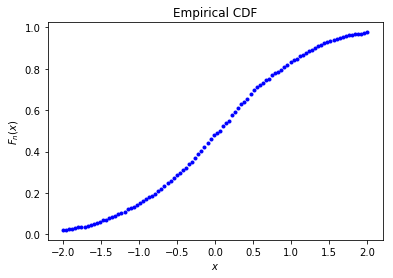

In [57]:
from random import uniform, normalvariate
import numpy as np
import matplotlib.pyplot as plt

class ECDF:
    def __init__(self, sample):
        self.observations = np.asarray(sample)
        self.observations.sort()
        self.N = self.observations.size
       
    def __call__(self, x):
        return self.observations.searchsorted(x) / self.N
    
    def plot(self, a, b):
        x_to_plot = np.linspace(a, b, 100)
        fig, ax = plt.subplots()
        ax.plot(x_to_plot, self(x_to_plot), 'b.')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$F_n(x)$')
        ax.set_title('Empirical CDF')
        plt.show()
        
    
F = ECDF(np.random.randn(1000))
F.plot(-2, 2)